checkout this kaggle kernel: https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=470167&userName=alexgomes3

---
# Google colab

In [0]:
  # Code to download the datasets (run only if dataset not found)
!mkdir input
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

test_downloaded = drive.CreateFile({'id': '1xBuctuuZBBvIjQmH0sg49Dx17CC1T2px'})
train_downloaded = drive.CreateFile({'id': '1aFyHjN9XXs051r_s1ydCfyq_5DWiCefJ'})
content_train = train_downloaded.GetContentFile("input/train.csv")
content_test = test_downloaded.GetContentFile("input/test.csv")

---

In [1]:
#import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.cluster import KMeans

# Using original images

In [2]:
df_train = pd.read_csv('../input/train.csv')

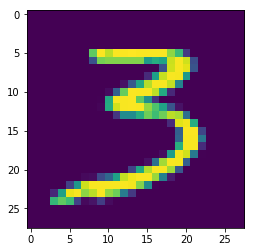

In [3]:
im_index = 5
first_image = df_train.iloc[25,1:].values.reshape(28,28)
plt.imshow(first_image)
plt.show()

# sample with 1k images

In [8]:
sample_1k = df_train.sample(1000)
X, y = sample_1k.drop(columns=['label']), sample_1k.label

X_train_1k, X_test_1k, y_train_1k, y_test_1k = train_test_split(X, y, train_size=0.7)

C:\Users\Alexandre\Anaconda3\envs\ldsa\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Log regression

In [6]:
lr_1k = LogisticRegression()

In [11]:
lr_1k.fit(X_train_1k, y_train_1k)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
#predicting
pred_lr_1k = lr_1k.predict(X_test_1k)
accuracy_score(y_test_1k, pred_lr_1k)

0.8166666666666667

# SVM

In [31]:
svm_1k = SVC(C=0.01)

#training
svm_1k.fit(X_train_1k, y_train_1k)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
#predicting
accuracy_score(y_test_1k, svm_1k.predict(X_test_1k))

0.11333333333333333

# KNN

In [36]:
knn_1k = KMeans(n_clusters=10)

#training
knn_1k.fit(X_train_1k, y_train_1k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
#predicting
accuracy_score(y_test_1k, knn_1k.predict(X_test_1k))

0.12666666666666668

# sample with 5k images

In [8]:
sample_5k = df_train.sample(5000)
X, y = sample_5k.drop(columns=['label']), sample_5k.label

X_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(X, y, train_size=0.7)

C:\Users\Alexandre\Anaconda3\envs\ldsa\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Log regression

In [9]:
lr_5k = LogisticRegression()

In [10]:
lr_5k.fit(X_train_5k, y_train_5k)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#predicting
accuracy_score(y_test_5k, lr_5k.predict(X_test_5k))

0.82

# SVM

In [14]:
svm_5k = SVC(C=0.01)

#training
svm_5k.fit(X_train_5k, y_train_5k)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
#predicting
accuracy_score(y_test_5k, svm_5k.predict(X_test_5k))

0.12866666666666668

# KNN

In [16]:
knn_5k = KMeans(n_clusters=10)

#training
knn_5k.fit(X_train_5k, y_train_5k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
#predicting
accuracy_score(y_test_5k, knn_5k.predict(X_test_5k))

0.202